In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = sns.load_dataset('titanic')

display(df.shape, df.head())

(891, 15)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
# 分布1
# 欠損値があると可視化時にエラーが発生するのでAgeの欠損値を削除
df0 = df.copy()
df0 = df0.dropna(subset=['age'])

df0.shape

(714, 15)

C:\Anaconda\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


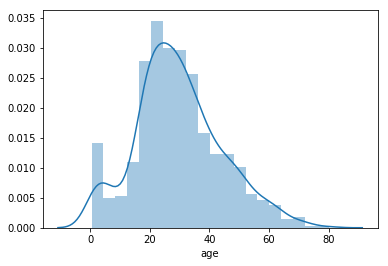

In [4]:
sns.distplot(df0['age'])

In [5]:
# 分布2
# 欠損値があると可視化時にエラーが発生するのでAgeの中央値で補完
df1 = df.copy()
df1['age'] = df1['age'].fillna(df1['age'].median())

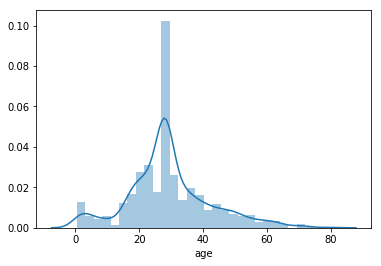

In [6]:
sns.distplot(df1['age'])

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <a list of 1 Patch objects>)

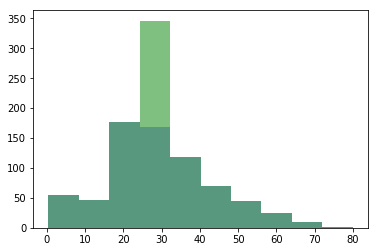

In [7]:
# 分布1と分布2を重ねて描画
plt.figure()
plt.hist(df0['age'], bins=10, alpha=0.3, histtype='stepfilled', color='b')
plt.hist(df1['age'], bins=10, alpha=0.5, histtype='stepfilled', color='g')

# 歪度と尖度を算出

歪度(Skewness) : 分布の非対称性を示す指標。値が正であると左側に山があり。逆に負であると右側に山がある。

尖度(Kurtosis) : 正規分布を基準とした分布の鋭さの指標。データが平均値近くに集まっているかどうかを示す指標。
正規分布の尖度を0と定義する場合と3と定義する場合がある。基準である正規分布の尖度よりも大きければ分布は尖っており、幅が狭く、小さければ緩やかな分布で、幅が広いということになる。

In [8]:
display('歪度(Skewness):{}'.format(df['age'].skew()), '尖度(Kurtosis):{}'.format(df['age'].kurt()))

'歪度(Skewness):0.38910778230082704'

'尖度(Kurtosis):0.17827415364210353'

In [9]:
display('歪度(Skewness):{}'.format(df1['age'].skew()), '尖度(Kurtosis):{}'.format(df1['age'].kurt()))

'歪度(Skewness):0.5102446555756495'

'尖度(Kurtosis):0.9938710163801736'

参考

https://qiita.com/ymmy02/items/36e708d3d9e5e4e6a457